## Import necessary libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
sb.set(rc={'figure.figsize':(11.7, 8.27)})

## Read and Display NBA data

In [4]:
nbadata = pd.read_csv(r'C:\Users\User\Downloads\nba_data_science_project\data\rawdata\nba_elo.csv')

In [5]:
display(nbadata.head())
display(nbadata.tail())

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
0,1946-11-01,1947,0,NaN,TRH,NYK,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,66.0,68.0,0,NaN,NaN
1,1946-11-02,1947,0,NaN,DTF,WSC,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,33.0,50.0,0,NaN,NaN
2,1946-11-02,1947,0,NaN,CHS,NYK,1300.0,1306.7233,0.631101,0.368899,...,NaN,NaN,NaN,NaN,NaN,63.0,47.0,0,NaN,NaN
3,1946-11-02,1947,0,NaN,PRO,BOS,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,59.0,53.0,0,NaN,NaN
4,1946-11-02,1947,0,NaN,STB,PIT,1300.0,1300.0000,0.640065,0.359935,...,NaN,NaN,NaN,NaN,NaN,56.0,51.0,0,NaN,NaN


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
73360,2023-06-07,2023,0,f,MIA,DEN,1640.358994,1649.957428,0.627240,0.372760,...,NaN,1648.392975,1703.343790,0.520214,0.479786,NaN,NaN,96,100.0,98.0
73361,2023-06-09,2023,0,f,MIA,DEN,1640.358994,1649.957428,0.627240,0.372760,...,NaN,1653.788445,1699.923946,0.532864,0.467136,NaN,NaN,97,100.0,99.0
73362,2023-06-12,2023,0,f,DEN,MIA,1649.957428,1640.358994,0.652693,0.347307,...,NaN,1698.924001,1655.210703,0.714539,0.285461,NaN,NaN,97,100.0,99.0
73363,2023-06-15,2023,0,f,MIA,DEN,1640.358994,1649.957428,0.627240,0.372760,...,NaN,1658.139952,1699.232363,0.540082,0.459918,NaN,NaN,97,100.0,99.0
73364,2023-06-18,2023,0,f,DEN,MIA,1649.957428,1640.358994,0.652693,0.347307,...,NaN,1699.232363,1658.139952,0.711452,0.288548,NaN,NaN,97,100.0,99.0


In [6]:
nbadata.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor1_pre', 'raptor2_pre',
       'raptor_prob1', 'raptor_prob2', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [7]:
#Explore the statistical features of the numerical variables/columns

nbadata.describe()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,...,carm-elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,quality,importance,total_rating
count,73365.000000,73365.000000,73365.000000,73365.000000,73365.000000,73365.000000,73358.000000,73358.000000,5249.000000,5249.000000,...,5249.000000,6271.000000,6271.000000,6271.000000,6271.000000,73358.000000,73358.000000,73365.000000,2645.000000,2645.000000
mean,1992.552130,0.002822,1497.632192,1497.846583,0.621032,0.378968,1497.447108,1498.003532,1514.442619,1512.956395,...,1514.005778,1504.665254,1501.707494,0.610630,0.389370,105.397353,101.841503,45.262700,28.875614,39.808696
std,19.597059,0.053043,111.819417,111.291555,0.177645,0.177645,112.271840,111.472124,118.284594,117.975403,...,117.934170,125.073441,125.108938,0.196568,0.196568,14.833300,14.398433,28.902233,28.737400,23.977132
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,...,1192.004524,865.245083,936.128372,0.027498,0.005665,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1977.000000,0.000000,1420.490000,1420.620600,0.499071,0.241132,1419.756525,1420.803250,1438.915861,1438.574702,...,1439.007779,1428.613438,1425.392155,0.475520,0.232761,96.000000,92.000000,20.000000,6.000000,20.000000
50%,1994.000000,0.000000,1503.394300,1504.279842,0.639871,0.360129,1503.384884,1504.311100,1513.701235,1513.414767,...,1514.116819,1514.379584,1508.570919,0.630013,0.369987,105.000000,102.000000,44.000000,19.000000,41.000000
75%,2009.000000,0.000000,1577.987500,1577.684264,0.758868,0.500929,1578.062722,1578.052025,1590.360355,1587.122603,...,1588.215959,1594.748700,1592.006587,0.767239,0.524480,115.000000,111.000000,70.000000,43.000000,54.000000
max,2023.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,...,1881.619599,1850.636656,1842.700562,0.994335,0.972502,184.000000,186.000000,100.000000,100.000000,100.000000


In [8]:
# Get the maximum/latest year in the dataframe

nbadata['season'].max()

2023

In [9]:
# Get the number of duplicated values, null values, and the categories of the 'playoff' column

display('DUPLICATES; ' , nbadata.duplicated().sum())
display('NULL VALUES; ' , nbadata.isnull().sum())
display('UNIQUE VALUES; ' , nbadata['playoff'].unique())

'DUPLICATES; '

0

'NULL VALUES; '

date                  0
season                0
neutral               0
playoff           68643
team1                 0
team2                 0
elo1_pre              0
elo2_pre              0
elo_prob1             0
elo_prob2             0
elo1_post             7
elo2_post             7
carm-elo1_pre     68116
carm-elo2_pre     68116
carm-elo_prob1    68116
carm-elo_prob2    68116
carm-elo1_post    68116
carm-elo2_post    68116
raptor1_pre       67094
raptor2_pre       67094
raptor_prob1      67094
raptor_prob2      67094
score1                7
score2                7
quality               0
importance        70720
total_rating      70720
dtype: int64

'UNIQUE VALUES; '

array([nan, 't', 'q', 's', 'c', 'f', 'p'], dtype=object)

In [10]:
columnstodrop = ['neutral', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'carm-elo1_pre', 'carm-elo2_pre', 'carm-elo_prob1', 'carm-elo_prob2',
       'carm-elo1_post', 'carm-elo2_post', 'raptor_prob1', 'raptor_prob2', 'quality',
       'importance', 'total_rating']

In [11]:
# Drop unnecessary columns

df = nbadata.drop(columns=columnstodrop)
df.head()

,date,season,playoff,team1,team2,elo1_pre,elo2_pre,raptor1_pre,raptor2_pre,score1,score2
0,1946-11-01,1947,NaN,TRH,NYK,1300.0,1300.0000,NaN,NaN,66.0,68.0
1,1946-11-02,1947,NaN,DTF,WSC,1300.0,1300.0000,NaN,NaN,33.0,50.0
2,1946-11-02,1947,NaN,CHS,NYK,1300.0,1306.7233,NaN,NaN,63.0,47.0
3,1946-11-02,1947,NaN,PRO,BOS,1300.0,1300.0000,NaN,NaN,59.0,53.0
4,1946-11-02,1947,NaN,STB,PIT,1300.0,1300.0000,NaN,NaN,56.0,51.0


In [12]:
# Create a 'result' column to diplay the results of each match; win or loss

df['result'] = np.where((df['score1'] > df['score2']), 'W', 'L')

In [13]:
# Separate the orignal dataframe into home and away dataframes to get results for both sides

hometeamdf = df[['date', 'season', 'playoff', 'team1', 'elo1_pre', 'score1', 'result']]
hometeamdf.head()

,date,season,playoff,team1,elo1_pre,score1,result
0,1946-11-01,1947,NaN,TRH,1300.0,66.0,L
1,1946-11-02,1947,NaN,DTF,1300.0,33.0,L
2,1946-11-02,1947,NaN,CHS,1300.0,63.0,W
3,1946-11-02,1947,NaN,PRO,1300.0,59.0,W
4,1946-11-02,1947,NaN,STB,1300.0,56.0,W


In [14]:
# Separate the orignal dataframe into home and away dataframes to get results for both sides

awayteamdf = df[['date', 'season', 'playoff', 'team2', 'elo2_pre', 'score2', 'result']]
resultswitch = {'L': 'W', 'W': 'L'}
awayteamdf['result'] = awayteamdf['result'].map(resultswitch)
awayteamdf.head()

,date,season,playoff,team2,elo2_pre,score2,result
0,1946-11-01,1947,NaN,NYK,1300.0000,68.0,W
1,1946-11-02,1947,NaN,WSC,1300.0000,50.0,W
2,1946-11-02,1947,NaN,NYK,1306.7233,47.0,L
3,1946-11-02,1947,NaN,BOS,1300.0000,53.0,L
4,1946-11-02,1947,NaN,PIT,1300.0000,51.0,L


In [15]:
# Rename the columns

hometeamdf.rename(columns={'team1': 'team', 'elo1_pre': 'elo_rating', 'score1': 'points'}, inplace=True)
awayteamdf.rename(columns={'team2': 'team', 'elo2_pre': 'elo_rating', 'score2': 'points'}, inplace=True)

## New Dataframe

* Create a new dataframe to contain rows for the 2016 to 2019 and 2021 to 2023 seasons.
* The 2020 season was omitted due to the COVID-19 pandemic, which caused the NBA to cut the season short.

* This is to ensure consistency within the dataframe, especially for the ML aspect.

In [16]:
# Create new dataframe with the selected seasons

years = [2016, 2017, 2018, 2019, 2021, 2022, 2023]

dflist =[]
for i in years:
    homedf = hometeamdf.loc[(hometeamdf['season'] == i)]
    awaydf = awayteamdf.loc[(awayteamdf['season'] == i)]
    dflist.append(homedf)
    dflist.append(awaydf)

nbadf = pd.concat(dflist, axis=0, ignore_index=True)
nbadf.head()

,date,season,playoff,team,elo_rating,points,result
0,2015-10-27,2016,NaN,ATL,1561.843550,94.0,L
1,2015-10-27,2016,NaN,CHI,1569.533975,97.0,W
2,2015-10-27,2016,NaN,GSW,1742.966075,111.0,W
3,2015-10-28,2016,NaN,ORL,1360.168625,87.0,L
4,2015-10-28,2016,NaN,DET,1492.605998,92.0,W


In [17]:
# Get the percentage of null values in the 'playoff' column and the shape of the dataframe

display(((nbadf['playoff'].isnull().sum())/nbadf.shape[0])*100)
display(nbadf.shape)

93.32597904026476

(18130, 7)

In [18]:
# Fill the null values with 'p' out of the categories within the 'playoff' column; [nan, 't', 'q', 's', 'c', 'f', 'p']
# 'p' stands for 'pre-playoffs'

nbadf['playoff'].fillna('p', inplace=True)

In [19]:
# Create dataframe containing only pre-playoff games

nbadf2 = nbadf.loc[(nbadf['playoff'] == 'p')]
nbadf2.reset_index(inplace=True, drop=True)
nbadf2.drop(columns=['playoff'], inplace=True)
nbadf2.head()

,date,season,team,elo_rating,points,result
0,2015-10-27,2016,ATL,1561.843550,94.0,L
1,2015-10-27,2016,CHI,1569.533975,97.0,W
2,2015-10-27,2016,GSW,1742.966075,111.0,W
3,2015-10-28,2016,ORL,1360.168625,87.0,L
4,2015-10-28,2016,DET,1492.605998,92.0,W


In [20]:
# Get percentage of null values to ensure no null value is left in the dataframe

display(((nbadf2.isnull().sum())/nbadf2.shape[0])*100)
display(nbadf2.shape)

date          0.0
season        0.0
team          0.0
elo_rating    0.0
points        0.0
result        0.0
dtype: float64

(16956, 6)

In [21]:
# Separate the 'result' column into wins and losses columns

nbadf2 = pd.get_dummies(nbadf2, columns=['result'], prefix='')
nbadf2.head()

,date,season,team,elo_rating,points,_L,_W
0,2015-10-27,2016,ATL,1561.843550,94.0,1,0
1,2015-10-27,2016,CHI,1569.533975,97.0,0,1
2,2015-10-27,2016,GSW,1742.966075,111.0,0,1
3,2015-10-28,2016,ORL,1360.168625,87.0,1,0
4,2015-10-28,2016,DET,1492.605998,92.0,0,1


In [22]:
# Group the dataframe by the 'year' and 'teams'
# Calculate the average numerical values

groupaverages = nbadf2.groupby(['season', 'team'], as_index=False).mean().round()
groupaverages.head()

,season,team,elo_rating,points,_L,_W
0,2016,ATL,1558.0,103.0,0.0,1.0
1,2016,BOS,1560.0,106.0,0.0,1.0
2,2016,BRK,1368.0,99.0,1.0,0.0
3,2016,CHI,1517.0,102.0,0.0,1.0
4,2016,CHO,1505.0,103.0,0.0,1.0


In [23]:
# Group the dataframe by the 'year' and 'teams'
# Calculate the total/sum of numerical values

groupsums = nbadf2.groupby(['season', 'team'], as_index=False).sum()
groupsums.drop(columns=['elo_rating'], inplace=True)
groupsums.head()

,season,team,points,_L,_W
0,2016,ATL,8433.0,34,48
1,2016,BOS,8669.0,34,48
2,2016,BRK,8089.0,61,21
3,2016,CHI,8335.0,40,42
4,2016,CHO,8479.0,34,48


In [24]:
# Create a league table by merging the total season points, wins, losses and the average elo_rating for each team

nbaleaguetable = groupsums.merge(groupaverages['elo_rating'], left_index=True, right_index=True)
elocolumn = nbaleaguetable.pop('elo_rating')
nbaleaguetable.insert(2, 'elo_rating', elocolumn)
nbaleaguetable.head()

,season,team,elo_rating,points,_L,_W
0,2016,ATL,1558.0,8433.0,34,48
1,2016,BOS,1560.0,8669.0,34,48
2,2016,BRK,1368.0,8089.0,61,21
3,2016,CHI,1517.0,8335.0,40,42
4,2016,CHO,1505.0,8479.0,34,48


In [25]:
# Calculate Win percentage for each team and assign the values to 'W%' column

nbaleaguetable['W%'] = ((nbaleaguetable['_W']/(nbaleaguetable['_W'] + nbaleaguetable['_L'])*100)).round(2)
nbaleaguetable.head()

,season,team,elo_rating,points,_L,_W,W%
0,2016,ATL,1558.0,8433.0,34,48,58.54
1,2016,BOS,1560.0,8669.0,34,48,58.54
2,2016,BRK,1368.0,8089.0,61,21,25.61
3,2016,CHI,1517.0,8335.0,40,42,51.22
4,2016,CHO,1505.0,8479.0,34,48,58.54


In [26]:
# Separate teams into Western and Eastern conferences

west= ['DAL', 'DEN', 'GSW', 'HOU', 'LAC', 
        'LAL', 'MEM', 'MIN', 'NOP', 'OKC', 'PHO', 'POR',
        'SAC', 'SAS', 'UTA']

east = ['ATL', 'BRK', 'BOS', 'CHO', 'CHI',
         'CLE', 'DET', 'IND', 'MIA',
        'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']

westleaguetable = nbaleaguetable[nbaleaguetable['team'].isin(west)]
westleaguetable.reset_index(drop=True, inplace=True)

eastleaguetable = nbaleaguetable[nbaleaguetable['team'].isin(east)]
eastleaguetable.reset_index(drop=True, inplace=True)

In [27]:
# Sort the west and east dataframes according to season and highest 'W%'

years = [2016, 2017, 2018, 2019, 2021, 2022, 2023]

westdflist =[]
eastdflist =[]

for i in years:
    westdf = westleaguetable.loc[(westleaguetable['season'] == i)]
    westdf.sort_values('W%', ascending=False, ignore_index=True, inplace=True)

    eastdf = eastleaguetable.loc[(eastleaguetable['season'] == i)]
    eastdf.sort_values('W%', ascending=False, ignore_index=True, inplace=True)

    westdflist.append(westdf)
    eastdflist.append(eastdf)

westleaguetable = pd.concat(westdflist, axis=0, ignore_index=False)
eastleaguetable = pd.concat(eastdflist, axis=0, ignore_index=False)

westleaguetable['conf'] = 'west'
eastleaguetable['conf'] = 'east'

In [28]:
# Create a function to determine teams that qualify for the playoffs based on the top 7 teams with the highest W%

def playoffs(df):
    playoffslist = []
    for i in df.index.values.tolist():
        if i <= 6:
            playoffslist.append(1)
        else:
            playoffslist.append(0)
    df['playoffs_y_n'] = pd.Series(playoffslist)
    df.reset_index(drop=True, inplace=True)
    return df

In [29]:
# Determine the teams that qualify for playoffs from each conference

westleaguetable = playoffs(westleaguetable)
eastleaguetable = playoffs(eastleaguetable)
display('WESTERN CONFERENCE; ', westleaguetable.head())
display('EASTERN CONFERENCE; ', eastleaguetable.head())

'WESTERN CONFERENCE; '

,season,team,elo_rating,points,_L,_W,W%,conf,playoffs_y_n
0,2016,GSW,1800.0,9421.0,9,73,89.02,west,1
1,2016,SAS,1745.0,8490.0,15,67,81.71,west,1
2,2016,OKC,1630.0,9038.0,27,55,67.07,west,1
3,2016,LAC,1626.0,8569.0,29,53,64.63,west,1
4,2016,POR,1534.0,8622.0,38,44,53.66,west,1


'EASTERN CONFERENCE; '

,season,team,elo_rating,points,_L,_W,W%,conf,playoffs_y_n
0,2016,CLE,1661.0,8555.0,25,57,69.51,east,1
1,2016,TOR,1582.0,8422.0,26,56,68.29,east,1
2,2016,ATL,1558.0,8433.0,34,48,58.54,east,1
3,2016,BOS,1560.0,8669.0,34,48,58.54,east,1
4,2016,CHO,1505.0,8479.0,34,48,58.54,east,1


## Data Visualisation

* A horizontal bar plot to visualise the winrates of the teams in each conference for the 2023 season

In [30]:
westleaguetable2023 = westleaguetable.loc[(westleaguetable['season'] == 2023)]
eastleaguetable2023 = eastleaguetable.loc[(westleaguetable['season'] == 2023)]

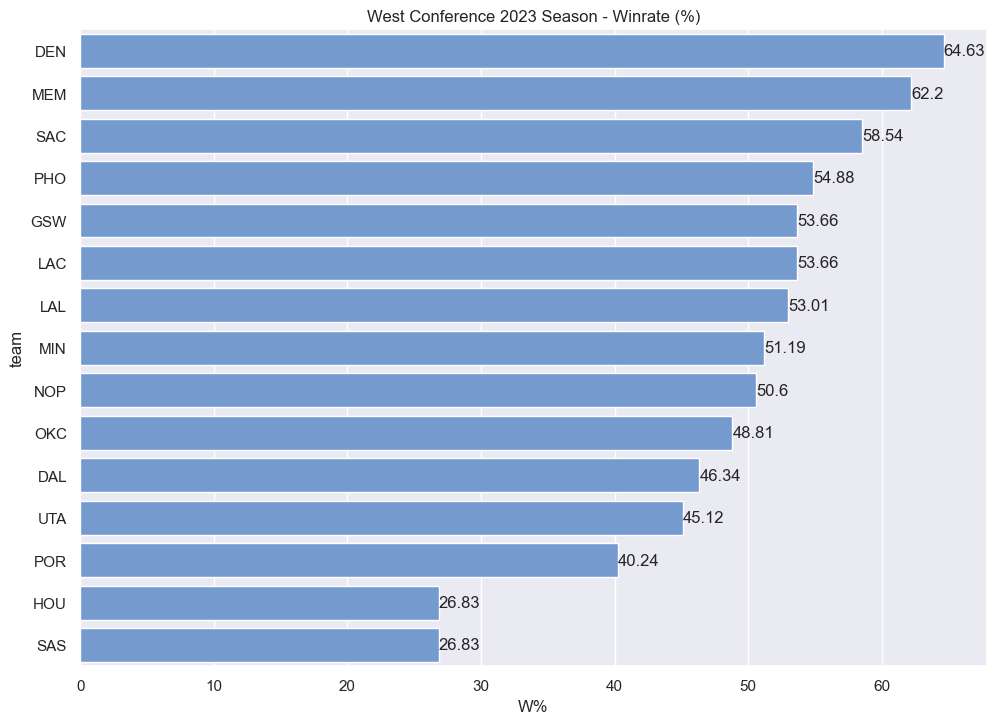

In [31]:
ax1 = sb.barplot(x='W%', y='team',data=westleaguetable2023, color='#69d')
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_title('West Conference 2023 Season - Winrate (%)')
plt.show()

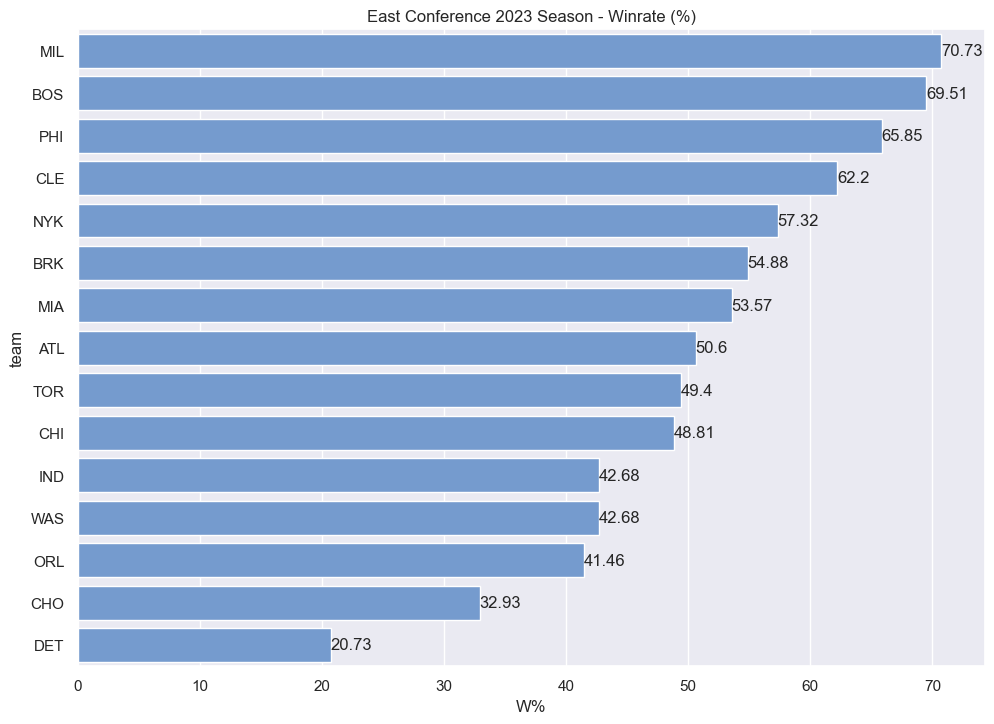

In [32]:
ax2 = sb.barplot(x='W%', y='team',data=eastleaguetable2023, color='#69d')
for i in ax2.containers:
    ax2.bar_label(i)
ax2.set_title('East Conference 2023 Season - Winrate (%)')
plt.show()

In [33]:
# Merge west and east league tables to form a dataframe for NBA 2016 to 2023 data

dflist =[]

for i in westleaguetable['season'].unique():
    westdf = westleaguetable.loc[(westleaguetable['season'] == i)]
    westdf.sort_values('W%', ascending=False, ignore_index=True, inplace=True)

    eastdf = eastleaguetable.loc[(eastleaguetable['season'] == i)]
    eastdf.sort_values('W%', ascending=False, ignore_index=True, inplace=True)

    dflist.append(westdf)
    dflist.append(eastdf)

nba16_23 = pd.concat(dflist, axis=0, ignore_index=True)

nba16_23.rename(columns={ '_L': 'L', '_W': 'W'}, inplace=True)
nba16_23.head()

,season,team,elo_rating,points,L,W,W%,conf,playoffs_y_n
0,2016,GSW,1800.0,9421.0,9,73,89.02,west,1
1,2016,SAS,1745.0,8490.0,15,67,81.71,west,1
2,2016,OKC,1630.0,9038.0,27,55,67.07,west,1
3,2016,LAC,1626.0,8569.0,29,53,64.63,west,1
4,2016,POR,1534.0,8622.0,38,44,53.66,west,1


In [34]:
# Save to csv file

#nba16_23.to_csv(r"C:\Users\User\Downloads\nba_data_science_project\data\transformed_data\nba_16-23.csv", index=False)